In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, pearsonr, f_oneway
from sklearn.linear_model import LinearRegression

# Load the dataset from the URL
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Display the first few rows to understand the structure
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


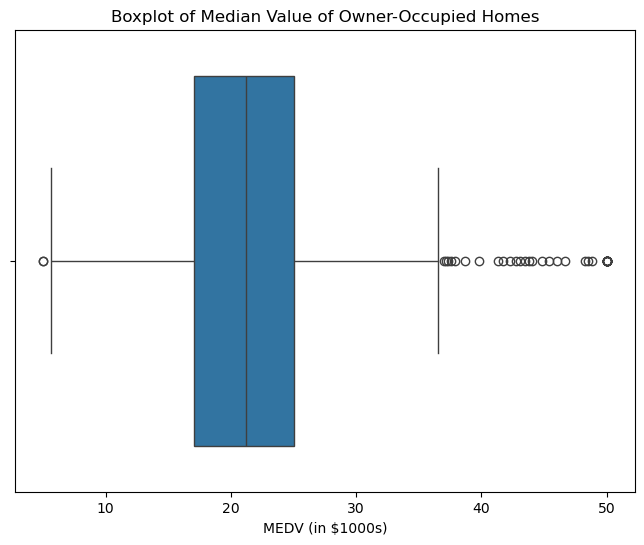

In [5]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('MEDV (in $1000s)')
plt.show()

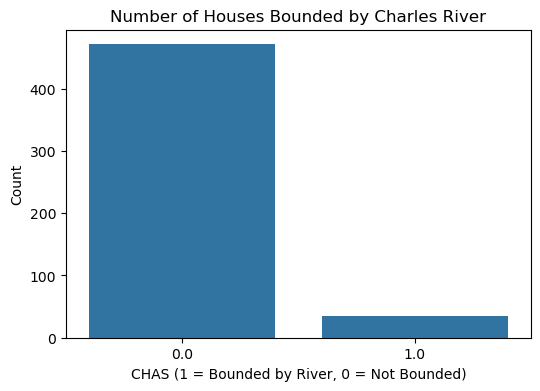

In [7]:
# Bar plot for Charles River variable (CHAS)
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Number of Houses Bounded by Charles River')
plt.xlabel('CHAS (1 = Bounded by River, 0 = Not Bounded)')
plt.ylabel('Count')
plt.show()


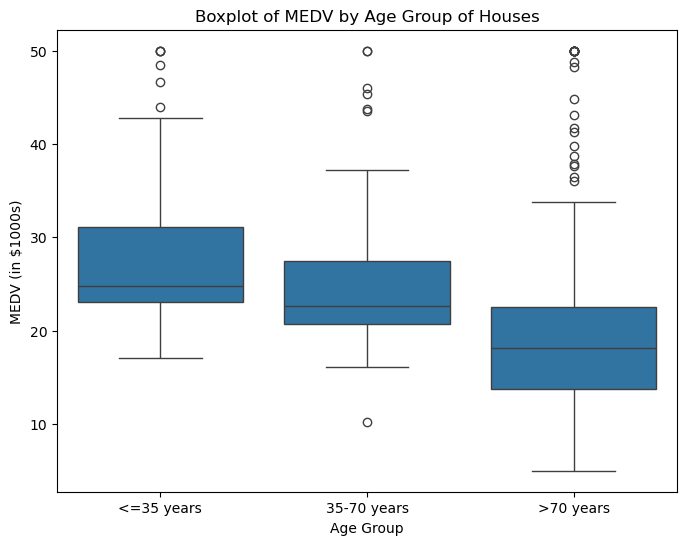

In [9]:
# Discretize the AGE variable into three categories
bins = [0, 35, 70, 100]
labels = ['<=35 years', '35-70 years', '>70 years']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group of Houses')
plt.xlabel('Age Group')
plt.ylabel('MEDV (in $1000s)')
plt.show()


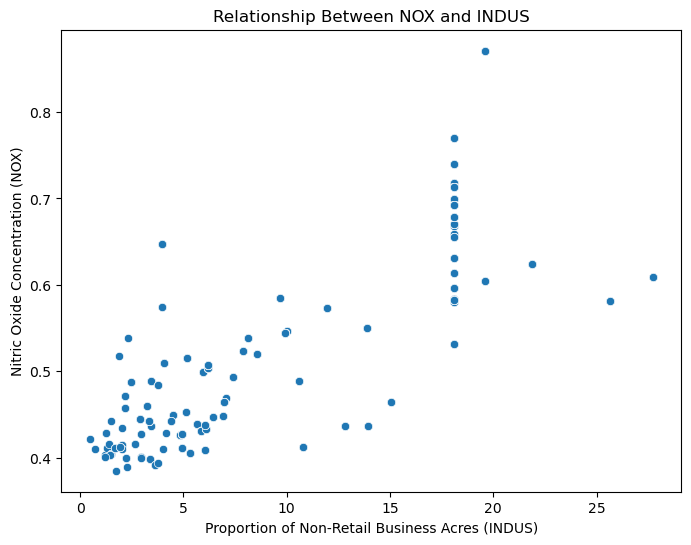

Pearson Correlation Coefficient between NOX and INDUS: 0.764


In [11]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship Between NOX and INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

# Calculate Pearson correlation coefficient between NOX and INDUS
corr, _ = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient between NOX and INDUS: {corr:.3f}")


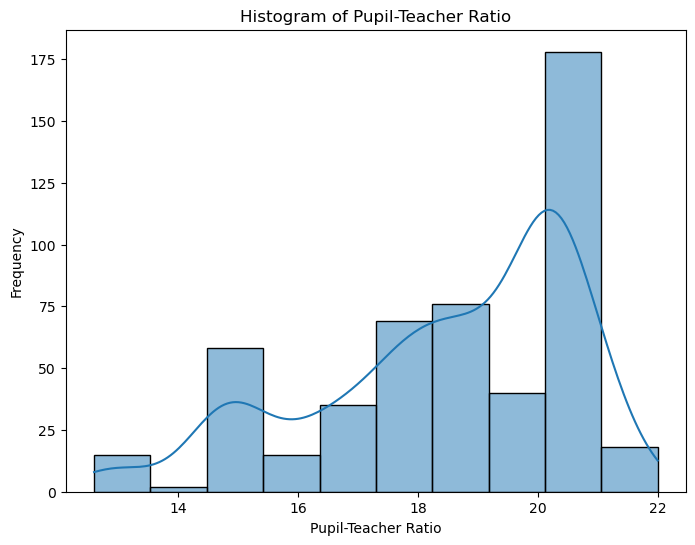

In [13]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [15]:
# T-test for independent samples (CHAS = 1 vs CHAS = 0)
river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(river_houses, non_river_houses)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median value of houses bounded by the Charles River.")


T-statistic: 3.996, P-value: 0.000
There is a significant difference in median value of houses bounded by the Charles River.


In [17]:
# ANOVA for AGE groups
age_groups = [boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels]
f_stat, p_value = f_oneway(*age_groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in median house values for different AGE groups.")
else:
    print("There is no significant difference in median house values for different AGE groups.")


ANOVA F-statistic: 36.408, P-value: 0.000
There is a significant difference in median house values for different AGE groups.


In [19]:
# Pearson correlation was already computed above:
# corr, _ = pearsonr(boston_df['NOX'], boston_df['INDUS'])
if p_value < 0.05:
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("There is no significant relationship between NOX and INDUS.")


There is a significant relationship between NOX and INDUS.


In [21]:
# Linear Regression for DIS vs MEDV
X = boston_df[['DIS']]
y = boston_df['MEDV']

# Create and fit the model
reg = LinearRegression()
reg.fit(X, y)

# Get the coefficient and intercept
coef = reg.coef_[0]
intercept = reg.intercept_

print(f"Regression equation: MEDV = {intercept:.3f} + {coef:.3f} * DIS")

# Conclusion
if coef < 0:
    print("An additional weighted distance to employment centers decreases the median home value.")
else:
    print("An additional weighted distance to employment centers increases the median home value.")


Regression equation: MEDV = 18.390 + 1.092 * DIS
An additional weighted distance to employment centers increases the median home value.
